# code for constructing the ENGLISH 2023 fMRI/ROI regressors
- donald dunagan
- 12 Jan 2023

### Imports

In [1]:
import math

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg as npl

from nilearn.glm.first_level import compute_regressor

from scipy.stats import pearsonr

import seaborn as sns

%matplotlib inline

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


In [2]:
sns.set(rc={'figure.figsize':(17,8)})

# Calculate Regressors

In [3]:
'''
This code is from Christophe Pallier:
https://github.com/chrplr/lpp-scripts3/blob/master/models/en/bottomup-topdown-ortho/orthonormalize.py
'''
def ortho_proj(Y, M):
    """ returns the orthogonal component of Y to the space spanned by M and the constant vector 1 """
    if M.ndim == 1:   # M is a vector but needs to be a 2-D matrix
        M = M[:, np.newaxis]
    I = np.ones(len(M))
    I = I[:, np.newaxis]
    M2 = np.hstack((I, M))  # adding the constant 
    betas,_,_,_ = npl.lstsq(M2, Y, rcond=None)
    Xc = np.dot(M2, betas)  # colinear component "residuals"
    Xo = Y - Xc
    return Xo

## 10 January Traversals
- This gives us the bottom up complexity metric from Milos

In [4]:
#read in the traversal regressors
traversal_spreadsheet = pd.read_csv('disc_proj_en_10Jan2022.csv')
traversal_spreadsheet

,praatword,word,chapter,section,section_time_onset,section_time_offset,whole_time_onset,whole_time_offset,subtl freq,disc_new_td,disc_new_bu,disc_new_lc,disc_new_rev,proj_new_td,proj_new_bu,proj_new_lc,proj_new_rev
0,once,once,1,1,0.113,0.728,0.113,0.728,344.88,5,1,2,2,5,1,2,2
1,when,when,1,1,0.728,0.919,0.728,0.919,2034.10,5,1,2,2,2,1,2,2
2,i,i,1,1,0.919,1.025,0.919,1.025,39971.16,1,1,2,2,2,1,2,2
3,was,was,1,1,1.025,1.158,1.025,1.158,5654.73,0,1,1,1,1,0,1,1
4,six,six,1,1,1.158,1.464,1.158,1.464,199.53,2,0,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15383,tell,tell,27,9,725.985,726.295,5621.980,5622.300,1724.49,2,0,1,1,2,0,1,1
15384,me,me,27,9,726.295,726.435,5622.300,5622.430,9241.94,1,2,2,2,1,2,2,2
15385,he,he,27,9,726.435,726.525,5622.430,5622.520,7637.20,3,1,2,2,3,1,2,2
15386,s,is,27,9,726.525,726.615,5622.520,5622.610,20731.39,1,0,1,1,1,0,1,1


## 9 April Complexities (Most Recent)
- Use Milos' rule system to pull the WH questions and Object Relative Clause items
- Object relatives are Rule 1
- WH questions are Rule 2

In [5]:
april9_complexity_spreadsheet = pd.read_csv('COMPLEXITIES__en_9apr2022.csv')
april9_complexity_spreadsheet

,praatword,word,sentence,objRel_sentence,chapter,section,section_time_onset,section_time_offset,whole_time_onset,whole_time_offset,...,new-proj-filler-gap,new-proj-filler-gap-only-filler,new-proj-filler-gap-only-gap,new-proj-filler-gap-only-rule-1,new-proj-filler-gap-only-rule-2,new-proj-filler-gap-only-rule-3,new-proj-filler-gap-only-rule-4,new-proj-filler-gap-only-rule-5,new-proj-filler-gap-only-rule-6,new-proj-filler-gap-only-rule-7
0,once,once,1.0,NaN,1,1,0.113,0.728,0.113,0.728,...,0,0,0,0,0,0,0,0,0,0
1,when,when,1.0,NaN,1,1,0.728,0.919,0.728,0.919,...,0,0,0,0,0,0,0,0,0,0
2,i,i,1.0,NaN,1,1,0.919,1.025,0.919,1.025,...,0,0,0,0,0,0,0,0,0,0
3,was,was,1.0,NaN,1,1,1.025,1.158,1.025,1.158,...,0,0,0,0,0,0,0,0,0,0
4,six,six,1.0,NaN,1,1,1.158,1.464,1.158,1.464,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15383,tell,tell,NaN,NaN,27,9,725.985,726.295,5621.980,5622.300,...,0,0,0,0,0,0,0,0,0,0
15384,me,me,NaN,NaN,27,9,726.295,726.435,5622.300,5622.430,...,0,0,0,0,0,0,0,0,0,0
15385,he,he,NaN,NaN,27,9,726.435,726.525,5622.430,5622.520,...,0,0,0,0,0,0,0,0,0,0
15386,s,is,NaN,NaN,27,9,726.525,726.615,5622.520,5622.610,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#april9_complexity_spreadsheet['volume'] = np.ceil(april9_complexity_spreadsheet.whole_time_offset/2.0)

In [7]:
#april9_complexity_spreadsheet[(april9_complexity_spreadsheet.sentence < 34) & (april9_complexity_spreadsheet.sentence !=29)].sentence.unique()

In [8]:
#print(april9_complexity_spreadsheet[(april9_complexity_spreadsheet.sentence < 34) & (april9_complexity_spreadsheet.sentence !=29)].volume.unique())
#print(len(april9_complexity_spreadsheet[(april9_complexity_spreadsheet.sentence < 34) & (april9_complexity_spreadsheet.sentence !=29)].volume.unique()))

In [9]:
#april9_complexity_spreadsheet[april9_complexity_spreadsheet.objRel_sentence > 0].objRel_sentence.unique()

In [10]:
#print(april9_complexity_spreadsheet[april9_complexity_spreadsheet.objRel_sentence > 0].volume.unique())
#print(len(april9_complexity_spreadsheet[april9_complexity_spreadsheet.objRel_sentence > 0].volume.unique()))

In [6]:
count = 0
inside = False

for i in range(len(april9_complexity_spreadsheet)):
    
    if april9_complexity_spreadsheet.iloc[i]['new-disc-filler-gap-only-rule-1']>=1 and inside ==False:
        count+=1
        inside=True
        
    if  april9_complexity_spreadsheet.iloc[i]['new-disc-filler-gap-only-rule-1']==0 and inside==True:
        inside=False

print(f"Object relatives: {count}")


count=0
for i in range(len(april9_complexity_spreadsheet)):
    
    if april9_complexity_spreadsheet.iloc[i]['new-disc-filler-gap-only-rule-2']>=1 and inside ==False:
        count+=1
        inside=True
        
    if  april9_complexity_spreadsheet.iloc[i]['new-disc-filler-gap-only-rule-2']==0 and inside==True:
        inside=False
        
print(f"WH:  {count}")

Object relatives: 32
WH:  74


## Check out Object relatives

In [11]:
april9_complexity_spreadsheet[april9_complexity_spreadsheet['new-disc-filler-gap-only-rule-1']>=1]

,praatword,word,sentence,objRel_sentence,chapter,section,section_time_onset,section_time_offset,whole_time_onset,whole_time_offset,...,new-proj-filler-gap,new-proj-filler-gap-only-filler,new-proj-filler-gap-only-gap,new-proj-filler-gap-only-rule-1,new-proj-filler-gap-only-rule-2,new-proj-filler-gap-only-rule-3,new-proj-filler-gap-only-rule-4,new-proj-filler-gap-only-rule-5,new-proj-filler-gap-only-rule-6,new-proj-filler-gap-only-rule-7
365,that,that,29.0,1.0,1,1,135.823,135.949,135.823,135.949,...,1,1,0,1,0,0,0,0,0,0
366,i,i,29.0,1.0,1,1,135.949,136.054,135.949,136.054,...,1,0,0,1,0,0,0,0,0,0
367,ve,have,29.0,1.0,1,1,136.054,136.149,136.054,136.149,...,1,0,0,1,0,0,0,0,0,0
368,always,always,29.0,1.0,1,1,136.149,136.524,136.149,136.524,...,1,0,0,1,0,0,0,0,0,0
369,kept,kept,29.0,1.0,1,1,136.524,136.958,136.524,136.958,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15197,that,that,NaN,31.0,27,9,655.093,655.263,5551.090,5551.260,...,1,1,0,1,0,0,0,0,0,0
15198,we,we,NaN,31.0,27,9,655.263,655.393,5551.260,5551.390,...,1,0,0,1,0,0,0,0,0,0
15199,have,have,NaN,31.0,27,9,655.393,655.513,5551.390,5551.510,...,1,0,0,1,0,0,0,0,0,0
15200,never,never,NaN,31.0,27,9,655.513,655.813,5551.510,5551.810,...,1,0,0,1,0,0,0,0,0,0


## Check out WH

In [12]:
#april9_complexity_spreadsheet[april9_complexity_spreadsheet['new-disc-filler-gap-only-rule-2']>=1]

## GPT2 surprisal

In [6]:
#read in the gpt2 spreadsheet with gpt2 surprisal regressor
gpt2_spreadsheet = pd.read_csv('Prince_gpt2.tsv',sep='\t')
gpt2_spreadsheet

,chapter,section,section_time_onset,section_time_offset,whole_time_onset,whole_time_offset,sentence_id,token_id,token,surprisal,maybe_mismatch
0,1,1,0.113,0.728,0.113,0.728,1,1,Once,0.000000,False
1,1,1,0.728,0.919,0.728,0.919,1,2,when,8.462531,False
2,1,1,0.919,1.025,0.919,1.025,1,3,I,2.585655,False
3,1,1,1.025,1.158,1.025,1.158,1,4,was,2.780438,False
4,1,1,1.158,1.464,1.158,1.464,1,5,six,7.878005,False
...,...,...,...,...,...,...,...,...,...,...,...
15383,27,9,725.985,726.295,5621.980,5622.300,1602,11,tell,4.710349,False
15384,27,9,726.295,726.435,5622.300,5622.430,1602,12,me,3.268568,False
15385,27,9,726.435,726.525,5622.430,5622.520,1602,13,he,9.189348,False
15386,27,9,726.525,726.615,5622.520,5622.610,1602,14,is,2.041129,False


## GPT3 Surprisal

In [7]:
'''
#read in the gpt3 surprisal file
with open('gpt3-surprisal.txt') as f:
    lines = f.readlines()
f.close()

words = []
vals = []
for i in range(len(lines)):
    if not lines[i]=='<s>\n' and not lines[i]=='</s>\n':
        word, val = lines[i].split()
        words.append(word)
        vals.append(val)
        
gpt3df = pd.DataFrame(data={'word':words,
                            'surprisal':[float(i) for i in vals],
                            'section_time_offset':april9_complexity_spreadsheet.section_time_offset,
                            'section':april9_complexity_spreadsheet.section})
gpt3df
'''

"\n#read in the gpt3 surprisal file\nwith open('gpt3-surprisal.txt') as f:\n    lines = f.readlines()\nf.close()\n\nwords = []\nvals = []\nfor i in range(len(lines)):\n    if not lines[i]=='<s>\n' and not lines[i]=='</s>\n':\n        word, val = lines[i].split()\n        words.append(word)\n        vals.append(val)\n        \ngpt3df = pd.DataFrame(data={'word':words,\n                            'surprisal':[float(i) for i in vals],\n                            'section_time_offset':april9_complexity_spreadsheet.section_time_offset,\n                            'section':april9_complexity_spreadsheet.section})\ngpt3df\n"

## Chinchilla Surprisal

In [8]:
'''
#read in the chinchilla surprisal file
with open('prince-chinchilla-surprisals.txt') as f:
    lines = f.readlines()
f.close()

words = []
vals = []
for i in range(len(lines)):
    if not lines[i]=='<s>\n' and not lines[i]=='</s>\n':
        word, val = lines[i].split()
        words.append(word)
        vals.append(val)
        
chinchilladf = pd.DataFrame(data={'word':words,
                            'surprisal':[float(i) for i in vals],
                            'section_time_offset':april9_complexity_spreadsheet.section_time_offset,
                            'section':april9_complexity_spreadsheet.section})
chinchilladf
'''

"\n#read in the chinchilla surprisal file\nwith open('prince-chinchilla-surprisals.txt') as f:\n    lines = f.readlines()\nf.close()\n\nwords = []\nvals = []\nfor i in range(len(lines)):\n    if not lines[i]=='<s>\n' and not lines[i]=='</s>\n':\n        word, val = lines[i].split()\n        words.append(word)\n        vals.append(val)\n        \nchinchilladf = pd.DataFrame(data={'word':words,\n                            'surprisal':[float(i) for i in vals],\n                            'section_time_offset':april9_complexity_spreadsheet.section_time_offset,\n                            'section':april9_complexity_spreadsheet.section})\nchinchilladf\n"

# Semantic Vectors

In [14]:
import fasttext.util
#fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin') 

In [15]:
fasttext.util.reduce_model(ft,5)

In [22]:
ft.get_word_vector('hello')

array([-0.03779324, -0.07486232, -0.00536113,  0.18865184,  0.23182346],
      dtype=float32)

In [1]:
'''
dims = [[],[],[],[],[]]
for word in ['hello']:
    for i in range(5):
        dims[i].append(ft.get_word_vector(word)[i])
        
print(dims)
'''

"\ndims = [[],[],[],[],[]]\nfor word in ['hello']:\n    for i in range(5):\n        dims[i].append(ft.get_word_vector(word)[i])\n        \nprint(dims)\n"

In [26]:
df = pd.DataFrame(columns=['dim1','dim2','dim3','dim4','dim5'])

for word in april9_complexity_spreadsheet.word:
    df.loc[len(df.index)] = ft.get_word_vector(word)

df

,dim1,dim2,dim3,dim4,dim5
0,0.230940,-0.044408,0.069549,0.017841,0.145492
1,0.192787,-0.103641,0.070145,-0.008982,0.217752
2,-0.932555,-1.313807,-0.128365,0.001472,1.265381
3,0.118771,-0.039460,0.159664,-0.121811,0.282027
4,0.182061,-0.056497,-0.093117,-0.395212,0.191140
...,...,...,...,...,...
15383,0.169052,-0.115545,0.110164,0.174706,0.210174
15384,-0.334837,-0.886916,0.221145,0.429946,1.011566
15385,-0.531462,-0.322343,0.747352,-0.284178,0.877668
15386,-0.247927,-0.621267,-0.081501,0.031281,0.467723


In [36]:
semandf = pd.concat([april9_complexity_spreadsheet[['word','section_time_offset','section']],df],axis=1)
semandf

,word,section_time_offset,section,dim1,dim2,dim3,dim4,dim5
0,once,0.728,1,0.230940,-0.044408,0.069549,0.017841,0.145492
1,when,0.919,1,0.192787,-0.103641,0.070145,-0.008982,0.217752
2,i,1.025,1,-0.932555,-1.313807,-0.128365,0.001472,1.265381
3,was,1.158,1,0.118771,-0.039460,0.159664,-0.121811,0.282027
4,six,1.464,1,0.182061,-0.056497,-0.093117,-0.395212,0.191140
...,...,...,...,...,...,...,...,...
15383,tell,726.295,9,0.169052,-0.115545,0.110164,0.174706,0.210174
15384,me,726.435,9,-0.334837,-0.886916,0.221145,0.429946,1.011566
15385,he,726.525,9,-0.531462,-0.322343,0.747352,-0.284178,0.877668
15386,is,726.615,9,-0.247927,-0.621267,-0.081501,0.031281,0.467723


In [34]:
#ft.get_word_vector('he')

In [40]:
#number of volumes in each section
n_scans = [282,298,340,303,265,343,325,292,368]

In [41]:
sum(n_scans)

2816

## Regressors

In [48]:
def convolve_regressors(section_num): 

    regressors_df = pd.DataFrame()
    '''
    compute_regressor() arguments:
        exp_condition: matrix of size 3 x num_events which consists of (onsets, durations, amplitudes)
        hrf_model: use spm
        frame_times: the sampling times

    regressors of interest are orthogonalized against word_rate
    '''
    #########
    #regressors of non-interest
    #########

    #word rate
    word_rate = compute_regressor(exp_condition = np.vstack((april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num].section_time_offset,
                                                                   np.zeros(len(april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num])),
                                                                   np.ones(len(april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num])) )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]

    #RMS
    rms_spreadsheet = pd.read_csv('{}_rms.csv'.format(section_num))
    rms = compute_regressor(exp_condition = np.vstack((rms_spreadsheet.onset,
                                                                   np.zeros(len(rms_spreadsheet)),
                                                                   rms_spreadsheet.amplitude )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]

    #freq
    freq_spreadsheet = pd.read_csv('{}_freq.csv'.format(section_num))
    freq = compute_regressor(exp_condition = np.vstack((freq_spreadsheet.onset,
                                                                   np.zeros(len(freq_spreadsheet)),
                                                                   freq_spreadsheet.amplitude )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]

    #f0
    f0_spreadsheet = pd.read_csv('{}_f0.csv'.format(section_num))
    f0 = compute_regressor(exp_condition = np.vstack((f0_spreadsheet.onset,
                                                                   np.zeros(len(f0_spreadsheet)),
                                                                   f0_spreadsheet.amplitude )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]


    ############################
    #regressors of interest
    ############################
    
    

    #new-disc-filler-gap
    disc_filler_gap = compute_regressor(exp_condition = np.vstack((april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num].section_time_offset,
                                                                   np.zeros(len(april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num])),
                                                                   april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num]['new-disc-filler-gap']
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    disc_filler_gap = ortho_proj(disc_filler_gap,word_rate)
    
    #object relative clauses
    obj_relatives = compute_regressor(exp_condition = np.vstack((april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num].section_time_offset,
                                                                   np.zeros(len(april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num])),
                                                                   april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num]['new-disc-filler-gap-only-rule-1']
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    obj_relatives = ortho_proj(obj_relatives,word_rate)
    
    #WH questions
    WH = compute_regressor(exp_condition = np.vstack((april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num].section_time_offset,
                                                                   np.zeros(len(april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num])),
                                                                   april9_complexity_spreadsheet[april9_complexity_spreadsheet['section']==section_num]['new-disc-filler-gap-only-rule-2']
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    WH = ortho_proj(WH,word_rate)
    
    

    
    #proj_new_bu
    projective_bottomup = compute_regressor(exp_condition = np.vstack((traversal_spreadsheet[traversal_spreadsheet['section']==section_num].section_time_offset,
                                                                   np.zeros(len(traversal_spreadsheet[traversal_spreadsheet['section']==section_num])),
                                                                   traversal_spreadsheet[traversal_spreadsheet['section']==section_num]['proj_new_bu']
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    projective_bottomup = ortho_proj(projective_bottomup,word_rate)
    
  
    
    
    
    
    #GPT-2 surprisal
    gpt2_surprisal = compute_regressor(exp_condition = np.vstack((gpt2_spreadsheet[gpt2_spreadsheet['section']==section_num].section_time_offset,
                                                                   np.zeros(len(gpt2_spreadsheet[gpt2_spreadsheet['section']==section_num])),
                                                                   gpt2_spreadsheet[gpt2_spreadsheet['section']==section_num].surprisal
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    gpt2_surprisal = ortho_proj(gpt2_surprisal,word_rate)

   
    #semantics
    seman_dim1 = compute_regressor(exp_condition = np.vstack((semandf[semandf['section']==section_num].section_time_offset,
                                                                   np.zeros(len(semandf[semandf['section']==section_num])),
                                                                   semandf[semandf['section']==section_num].dim1
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    seman_dim1 = ortho_proj(seman_dim1,word_rate)
    
    seman_dim2 = compute_regressor(exp_condition = np.vstack((semandf[semandf['section']==section_num].section_time_offset,
                                                                   np.zeros(len(semandf[semandf['section']==section_num])),
                                                                   semandf[semandf['section']==section_num].dim2
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    seman_dim2 = ortho_proj(seman_dim2,word_rate)
    
    seman_dim3 = compute_regressor(exp_condition = np.vstack((semandf[semandf['section']==section_num].section_time_offset,
                                                                   np.zeros(len(semandf[semandf['section']==section_num])),
                                                                   semandf[semandf['section']==section_num].dim3
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    seman_dim3 = ortho_proj(seman_dim3,word_rate)
    
    seman_dim4 = compute_regressor(exp_condition = np.vstack((semandf[semandf['section']==section_num].section_time_offset,
                                                                   np.zeros(len(semandf[semandf['section']==section_num])),
                                                                   semandf[semandf['section']==section_num].dim4
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    seman_dim4 = ortho_proj(seman_dim4,word_rate)

    seman_dim5 = compute_regressor(exp_condition = np.vstack((semandf[semandf['section']==section_num].section_time_offset,
                                                                   np.zeros(len(semandf[semandf['section']==section_num])),
                                                                   semandf[semandf['section']==section_num].dim5
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    seman_dim5 = ortho_proj(seman_dim5,word_rate)

    
    
    #GPT3 surprisal
    '''
    gpt3_surprisal = compute_regressor(exp_condition = np.vstack((gpt3df[gpt3df['section']==section_num].section_time_offset,
                                                                   np.zeros(len(gpt3df[gpt3df['section']==section_num])),
                                                                   gpt3df[gpt3df['section']==section_num].surprisal
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    gpt3_surprisal = ortho_proj(gpt3_surprisal,word_rate)
    '''
    #Chinhilla surprisal
    '''
    chinchilla_surprisal = compute_regressor(exp_condition = np.vstack((chinchilladf[chinchilladf['section']==section_num].section_time_offset,
                                                                   np.zeros(len(chinchilladf[chinchilladf['section']==section_num])),
                                                                   chinchilladf[chinchilladf['section']==section_num].surprisal
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    chinchilla_surprisal = ortho_proj(chinchilla_surprisal,word_rate)    
    '''
    #Gopher surprisal
    #new-disc-Gopher
    '''
    gopher_surprisal = compute_regressor(exp_condition = np.vstack((complexity_spreadsheet[complexity_spreadsheet['section']==section_num].section_time_offset,
                                                                   np.zeros(len(complexity_spreadsheet[complexity_spreadsheet['section']==section_num])),
                                                                   complexity_spreadsheet[complexity_spreadsheet['section']==section_num]['new-disc-Gopher']
                                                                      )),
                                                      hrf_model="spm",
                                                      frame_times = np.arange(0.0, n_scans[section_num-1] * 2.0, 2.0))[0]
    gopher_surprisal = ortho_proj(gopher_surprisal,word_rate)    
    '''
    
    
    
    
    #store all of the  regressors
    regressors_df['word_rate']=word_rate.flatten()
    regressors_df['rms']=rms.flatten()
    regressors_df['freq']=freq.flatten()
    regressors_df['f0']=f0.flatten()
    
    regressors_df['disc_filler_gap']=disc_filler_gap.flatten() 
    regressors_df['obj_relatives']=obj_relatives.flatten()
    regressors_df['WH']=WH.flatten()
        
    regressors_df['projective_bottomup']=projective_bottomup.flatten()    
        
        
    regressors_df['gpt2_surprisal']= gpt2_surprisal.flatten()
    #regressors_df['gpt3_surprisal']=gpt3_surprisal.flatten()
    #regressors_df['chinchilla_surprisal']=chinchilla_surprisal.flatten()

    regressors_df['seman_dim1'] = seman_dim1.flatten()
    regressors_df['seman_dim2'] = seman_dim2.flatten()
    regressors_df['seman_dim3'] = seman_dim3.flatten()
    regressors_df['seman_dim4'] = seman_dim4.flatten()
    regressors_df['seman_dim5'] = seman_dim5.flatten()

    regressors_df['section']=[section_num]*n_scans[section_num-1]
    
    return regressors_df

In [49]:
big_data = pd.DataFrame()
sections=[1,2,3,4,5,6,7,8,9]
for i in sections:
    data = convolve_regressors(i)
    big_data = big_data.append(data)

In [50]:
big_data

,word_rate,rms,freq,f0,disc_filler_gap,obj_relatives,WH,projective_bottomup,gpt2_surprisal,seman_dim1,seman_dim2,seman_dim3,seman_dim4,seman_dim5,section
0,0.000000,0.000000,0.000000,0.000000,0.002015,0.004363,-0.002348,-0.017272,-0.211151,-0.002426,-0.010510,-0.004658,-0.003323,0.003490,1
1,0.000647,0.009437,0.004752,10.491500,0.001987,0.004331,-0.002343,-0.017427,-0.211895,-0.002380,-0.010415,-0.004630,-0.003327,0.003522,1
2,0.027805,0.145643,0.208735,179.405197,0.000836,0.002982,-0.002146,-0.021824,-0.228904,-0.002049,-0.007340,-0.003901,-0.005096,0.005960,1
3,0.079646,0.367299,0.596170,533.032462,-0.001362,0.000407,-0.001769,-0.020417,-0.254466,-0.003281,-0.004792,-0.002048,-0.008120,0.012568,1
4,0.117950,0.487003,0.849367,805.795838,-0.002986,-0.001496,-0.001490,-0.038469,-0.181909,-0.001954,0.000890,-0.001032,-0.009490,0.007483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.110392,0.435250,0.822411,795.012732,-0.002103,-0.000672,-0.001431,0.049302,-0.047509,-0.002866,-0.005946,0.003170,0.004929,0.006803,9
364,0.112029,0.395219,0.842175,768.481156,-0.002155,-0.000683,-0.001472,0.026709,0.011026,-0.004760,-0.009112,0.002615,0.007920,0.008207,9
365,0.118791,0.338782,0.917951,671.511479,-0.002373,-0.000729,-0.001643,0.034818,0.103522,-0.008975,-0.010902,0.006388,0.007987,0.013135,9
366,0.086186,0.190876,0.690954,393.743804,-0.001325,-0.000507,-0.000818,0.050429,0.047821,-0.009912,-0.012176,0.004963,0.006169,0.013943,9


In [52]:
big_data.to_csv('lpp_en_regressors_12Jan2023.tsv',index=False,sep='\t')

## Correlations

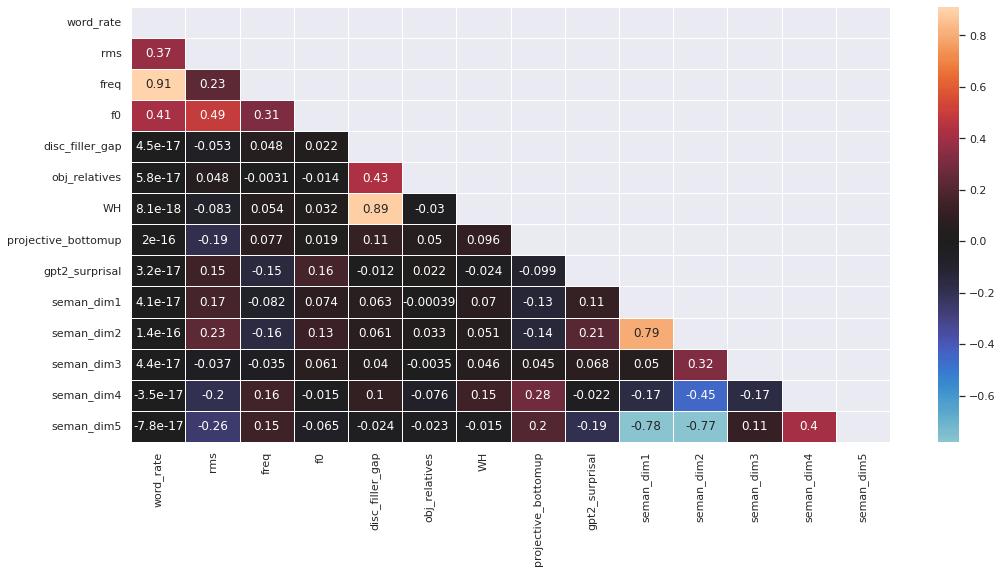

In [51]:
corr = big_data.drop(columns=['section',
        ]).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
picture = sns.heatmap(corr,center=0,linewidth=.5,mask=mask,annot=True)
#figure = picture.get_figure()

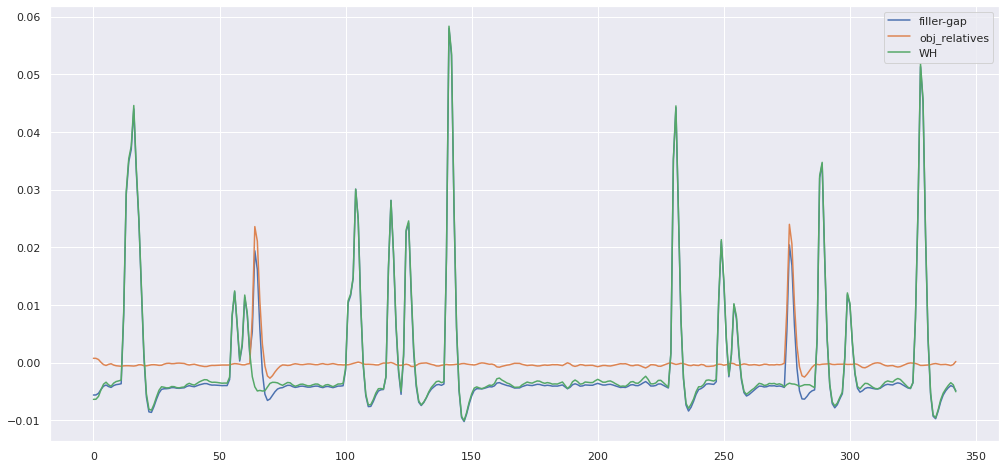

In [18]:
section =6

plt.plot(big_data[big_data.section==section].disc_filler_gap,label='filler-gap')
plt.plot(big_data[big_data.section==section].obj_relatives,label='obj_relatives')
plt.plot(big_data[big_data.section==section].WH,label='WH')
plt.legend()
plt.show()

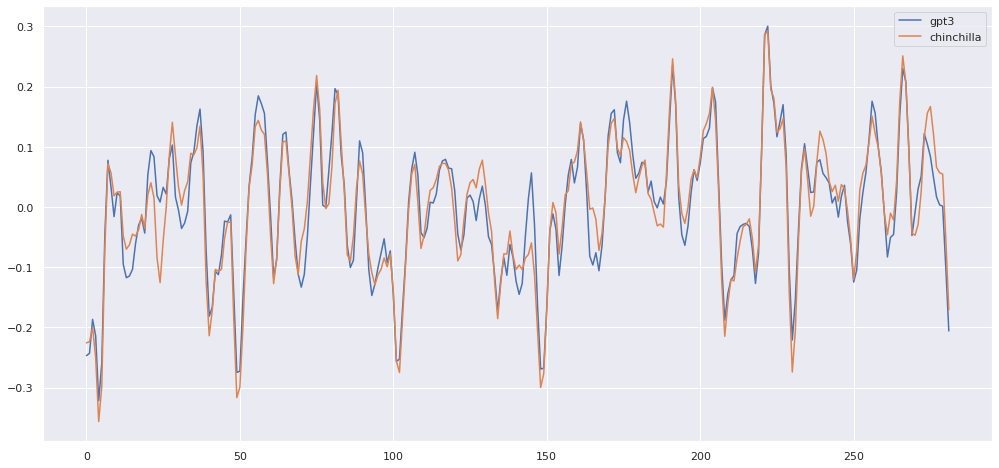

In [21]:
plt.plot(big_data[big_data.section==1].gpt3_surprisal,label='gpt3')
plt.plot(big_data[big_data.section==1].chinchilla_surprisal,label='chinchilla')
#plt.plot(big_data[big_data.section==1].gpt2_surprisal,label='gpt2')

plt.legend()
plt.show()

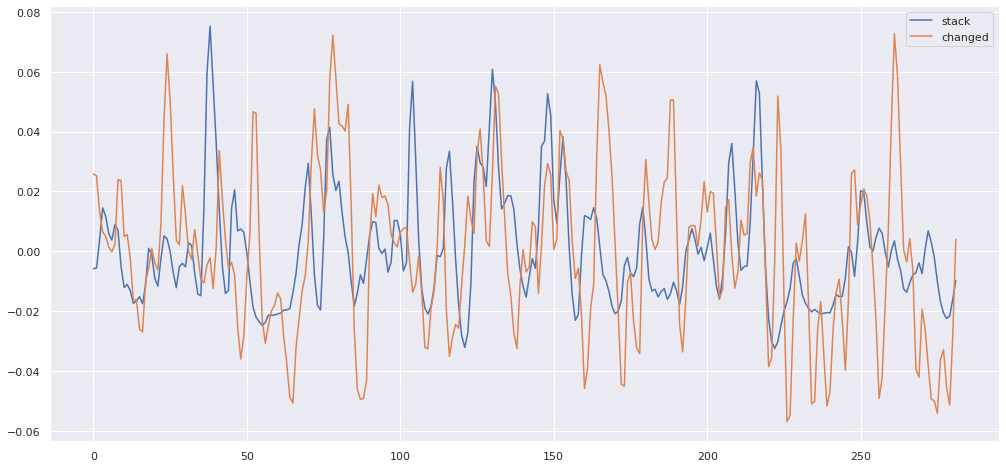

In [38]:
section =1

plt.plot(big_data[big_data.section==section].disc_lcrev_stack,label='stack')
plt.plot(big_data[big_data.section==section].disc_lcrev_changed,label='changed')

plt.legend()
plt.show()